# Entrenamiento estocástico y por bloques

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import np
session = tf.compat.v1.Session()
tf.compat.v1.disable_eager_execution()

In [6]:
batch_size = 25

In [7]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

In [11]:
x_data = tf.compat.v1.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.compat.v1.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.compat.v1.random_normal(shape=[1,1]))

In [12]:
my_prediction = tf.matmul(x_data, A)

In [13]:
loss = tf.reduce_mean(tf.square(my_prediction-y_target))

In [15]:
my_optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.025)
train_step = my_optimizer.minimize(loss)

In [17]:
init = tf.compat.v1.global_variables_initializer()

In [18]:
session.run(init)

In [19]:
loss_batch = []
for i in range(200):
    rand_index = np.random.choice(200, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_batch.append(temp_loss)

Paso #5 A=[[2.7273147]]
Loss: 52.52061
Paso #10 A=[[4.365241]]
Loss: 32.332787
Paso #15 A=[[5.6295586]]
Loss: 20.267315
Paso #20 A=[[6.6026573]]
Loss: 12.304277
Paso #25 A=[[7.360753]]
Loss: 8.600286
Paso #30 A=[[7.9386325]]
Loss: 4.404024
Paso #35 A=[[8.384324]]
Loss: 3.591583
Paso #40 A=[[8.722699]]
Loss: 1.8414543
Paso #45 A=[[8.969088]]
Loss: 1.9478726
Paso #50 A=[[9.197517]]
Loss: 1.2250584
Paso #55 A=[[9.32996]]
Loss: 1.2940809
Paso #60 A=[[9.48216]]
Loss: 0.7905303
Paso #65 A=[[9.562136]]
Loss: 0.35212955
Paso #70 A=[[9.66244]]
Loss: 0.57670754
Paso #75 A=[[9.693889]]
Loss: 1.0169611
Paso #80 A=[[9.756004]]
Loss: 0.7734878
Paso #85 A=[[9.782992]]
Loss: 1.1435679
Paso #90 A=[[9.777326]]
Loss: 0.7449287
Paso #95 A=[[9.814391]]
Loss: 1.2432256
Paso #100 A=[[9.852632]]
Loss: 0.7349309
Paso #105 A=[[9.846424]]
Loss: 0.6323051
Paso #110 A=[[9.850613]]
Loss: 0.76695323
Paso #115 A=[[9.834481]]
Loss: 1.0589397
Paso #120 A=[[9.865497]]
Loss: 1.1335557
Paso #125 A=[[9.870833]]
Loss: 1.441

In [20]:
loss_stochastic = []
for i in range(200):
    rand_index = np.random.choice(200, size=1)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_stochastic.append(temp_loss)

Paso #5 A=[[9.785801]]
Loss: 0.016258331
Paso #10 A=[[9.853006]]
Loss: 0.14240587
Paso #15 A=[[9.750226]]
Loss: 0.20141381
Paso #20 A=[[9.715738]]
Loss: 0.17476086
Paso #25 A=[[9.7816725]]
Loss: 0.11552748
Paso #30 A=[[9.875046]]
Loss: 0.31025875
Paso #35 A=[[9.696681]]
Loss: 0.048148256
Paso #40 A=[[9.522204]]
Loss: 0.5619608
Paso #45 A=[[9.625457]]
Loss: 3.361442
Paso #50 A=[[9.607005]]
Loss: 4.8211074
Paso #55 A=[[9.540237]]
Loss: 5.2362885
Paso #60 A=[[9.490262]]
Loss: 0.1439793
Paso #65 A=[[9.579234]]
Loss: 0.07051612
Paso #70 A=[[9.741894]]
Loss: 0.647057
Paso #75 A=[[9.844458]]
Loss: 0.6271051
Paso #80 A=[[9.862595]]
Loss: 0.2765035
Paso #85 A=[[9.805009]]
Loss: 0.5237162
Paso #90 A=[[9.953919]]
Loss: 0.36847723
Paso #95 A=[[9.999593]]
Loss: 0.012368696
Paso #100 A=[[9.819903]]
Loss: 0.85972697
Paso #105 A=[[9.839274]]
Loss: 0.97485906
Paso #110 A=[[9.807096]]
Loss: 1.8971872
Paso #115 A=[[9.78495]]
Loss: 0.03954764
Paso #120 A=[[9.616352]]
Loss: 0.60243654
Paso #125 A=[[9.71303

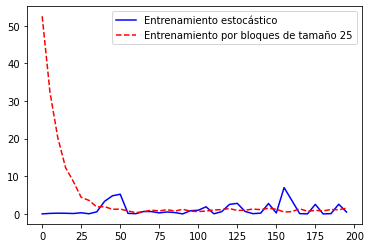

In [21]:
plt.plot(range(0,200,5), loss_stochastic, 'b-', label = "Entrenamiento estocástico")
plt.plot(range(0,200,5), loss_batch, 'r--', label = "Entrenamiento por bloques de tamaño 25")
plt.legend(loc="upper right", prop={'size':10})
plt.show()